### USAUD FUNDING CUTS SENTIMENT ANALYSIS 

### Introduction

.....(light intro text)
.....(TBD)

### Data 

This is data preparation phase for the project. The dataset used here is compiled from two primary sources: Reddit (via web scraping) and NewsAPI (via API calls). Each contributor collected data independently from these platforms, targeting relevant topics for analysis. Below, we begin by importing the collected datasets, merging them, and performing initial cleaning steps to prepare the data for further exploration and modeling.



#### Data Importation

##### news_data

In [1]:
import os
import pandas as pd

# Set the path to your news_data folder
folder_path = r'N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\raw\news_data'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and display columns for each CSV file
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        raw_reddit_df = pd.read_csv(file_path, nrows=0)  # Read only headers
        print(f"Columns in {file}:")
        print(list(raw_reddit_df.columns))
        print("-" * 50)
    except Exception as e:
        print(f"Error reading {file}: {e}")


Columns in Agatha_news.csv:
['keyword', 'source', 'author', 'title', 'description', 'content', 'publishedAt', 'url']
--------------------------------------------------
Columns in Agatha_news_fulltext.csv:
['keyword', 'source', 'author', 'title', 'publishedAt', 'summary', 'text', 'url']
--------------------------------------------------
Columns in cecilia.newsapi.csv:
['keyword', 'source', 'author', 'title', 'description', 'content', 'url', 'publishedAt', 'urlToImage']
--------------------------------------------------
Columns in leo_newsapi_articles_enriched.csv:
['source', 'author', 'title', 'description', 'content', 'url', 'published_at', 'full_text']
--------------------------------------------------
Columns in Mbego_news_usaid_kenya_fulltext.csv:
['source', 'author', 'title', 'description', 'url', 'publishedAt', 'summary', 'full_text']
--------------------------------------------------
Columns in Mbego_news_usaid_kenya_recent.csv:
['source', 'author', 'title', 'description', 'url',

##### reddit_data

In [2]:

# Set the path to your news_data folder
folder_path = r'N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\raw\reddit_data'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and display columns for each CSV file
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        raw_reddit_df = pd.read_csv(file_path, nrows=0)  # Read only headers
        print(f"Columns in {file}:")
        print(list(raw_reddit_df.columns))
        print("-" * 50)
    except Exception as e:
        print(f"Error reading {file}: {e}")


Columns in Agatha_reddit.csv:
['title', 'selftext', 'subreddit', 'author', 'created_utc', 'url', 'score', 'num_comments', 'keyword']
--------------------------------------------------
Columns in cecilia.redditsubs.csv:
['subreddit', 'keyword', 'title', 'text', 'date_posted', 'upvotes', 'comments', 'url', 'permalink']
--------------------------------------------------
Columns in cecilia.reddit_nbo_ke_africa.csv:
['subreddit', 'keyword', 'title', 'text', 'date_posted', 'upvotes', 'comments', 'url', 'permalink']
--------------------------------------------------
Columns in leo_reddit_posts.csv:
['subreddit', 'search_term', 'title', 'text', 'created_utc', 'created_date', 'score', 'num_comments', 'permalink', 'url']
--------------------------------------------------
Columns in Mbego_reddit_usaid_kenya.csv:
['title', 'score', 'url', 'created', 'subreddit', 'selftext']
--------------------------------------------------
Columns in Mbego_reddit_usaid_kenya2.csv:
['title', 'score', 'url', 'creat

#### Data Merging 

##### news_data



In [3]:

# Folder containing all News CSVs
folder_path = r'N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\raw\news_data'

# Final save location
save_path = r"correct path removed"

# All .csv files in the news_data folder
news_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Define the final standardized columns
standard_news_cols = [
    'keyword', 'source', 'author', 'title', 'description', 'content',
    'summary', 'full_text', 'publishedAt', 'url', 'language'
]

# Create empty master DataFrame
merged_news_df = pd.DataFrame(columns=standard_news_cols)

# Loop through each file
for file in news_files:
    file_path = os.path.join(folder_path, file)
    try:
        raw_reddit_df = pd.read_csv(file_path)

        # Drop index column if present
        if 'Unnamed: 0' in raw_reddit_df.columns:
            raw_reddit_df.drop(columns=['Unnamed: 0'], inplace=True)

        # Standardize column names
        raw_reddit_df.rename(columns={
            'published_at': 'publishedAt',
            'published_date': 'publishedAt',
            'text': 'content'
        }, inplace=True)

        # Add missing columns
        for col in standard_news_cols:
            if col not in raw_reddit_df.columns:
                raw_reddit_df[col] = pd.NA

        # Align column order
        raw_reddit_df = raw_reddit_df[standard_news_cols]

        # Add to master DataFrame
        merged_news_df = pd.concat([merged_news_df, raw_reddit_df], ignore_index=True)

        print(f"✅ Merged: {file}")
    except Exception as e:
        print(f" Error processing {file}: {e}")

# Save merged file
#output_path = os.path.join(save_path, 'Mbego_all_news_merged.csv')
#merged_news_df.to_csv(output_path, index=False)

#print(f"\n✅ All News files merged and saved to '{output_path}'")


✅ Merged: Agatha_news.csv
✅ Merged: Agatha_news_fulltext.csv
✅ Merged: cecilia.newsapi.csv
✅ Merged: leo_newsapi_articles_enriched.csv
✅ Merged: Mbego_news_usaid_kenya_fulltext.csv
✅ Merged: Mbego_news_usaid_kenya_recent.csv
✅ Merged: newsapi_usaid_articles.csv
✅ Merged: ruth_news.csv


In [4]:

news_merged_path = r"N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\individual datasets\Mbego_all_news_merged.csv"

news_mbegoall_df = pd.read_csv(news_merged_path)

news_mbegoall_df.head(3)


,keyword,source,author,title,description,content,summary,full_text,publishedAt,url,language
0,usaid kenya,Al Jazeera English,Al Jazeera,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,NaN,NaN,2025-06-06T11:21:51Z,https://www.aljazeera.com/news/2025/6/6/has-do...,NaN
1,usaid kenya,CleanTechnica,Guest Contributor,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,NaN,NaN,2025-05-26T17:13:41Z,https://cleantechnica.com/2025/05/26/the-life-...,NaN
2,usaid kenya,ProPublica,by Brett Murphy and Anna Maria Barry-Jester,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,NaN,NaN,2025-05-28T18:45:00Z,https://www.propublica.org/article/trump-usaid...,NaN


##### reddit_data

In [5]:

# Define paths
folder_path = r'N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\raw\reddit_data'
save_path = r'N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\individual datasets'

# Define standard columns
standard_cols = [
    'title', 'selftext', 'subreddit', 'author', 'created_utc',
    'created_date', 'score', 'num_comments', 'keyword', 'search_term',
    'date_posted', 'upvotes', 'comments', 'url', 'permalink'
]

# Initialize master DataFrame
merged_df = pd.DataFrame(columns=standard_cols)

# Get all CSV files in folder
reddit_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop through each CSV file
for file in reddit_files:
    file_path = os.path.join(folder_path, file)
    try:
        raw_reddit_df = pd.read_csv(file_path)

        # Drop any unnamed index column
        if 'Unnamed: 0' in raw_reddit_df.columns:
            raw_reddit_df.drop(columns=['Unnamed: 0'], inplace=True)

        # Rename common variations
        raw_reddit_df.rename(columns={
            'text': 'selftext',
            'created': 'created_utc'
        }, inplace=True)

        # Add missing columns as empty (NA)
        for col in standard_cols:
            if col not in raw_reddit_df.columns:
                raw_reddit_df[col] = pd.NA

        # Reorder columns to match standard
        raw_reddit_df = raw_reddit_df[standard_cols]

        # Append to the master DataFrame
        merged_df = pd.concat([merged_df, raw_reddit_df], ignore_index=True)

        print(f"✅ Merged: {file}")
    except Exception as e:
        print(f" Error processing {file}: {e}")

# Save merged result
#output_file = os.path.join(save_path, 'mbego_all_reddit_merged.csv')
#merged_df.to_csv(output_file, index=False)
#print(f"\n✅ All Reddit files merged and saved to '{output_file}'")


✅ Merged: Agatha_reddit.csv
✅ Merged: cecilia.redditsubs.csv
✅ Merged: cecilia.reddit_nbo_ke_africa.csv
✅ Merged: leo_reddit_posts.csv
✅ Merged: Mbego_reddit_usaid_kenya.csv
✅ Merged: Mbego_reddit_usaid_kenya2.csv
✅ Merged: reddit_usaid_kenya.csv
✅ Merged: reddit_usaid_sentiment.csv
✅ Merged: ruth_reddit.csv


In [6]:

reddit_merged_path = r"N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\reddit_data\reddit_data.csv"

raw_reddit_df = pd.read_csv(reddit_merged_path)

raw_reddit_df.head(3)

,title,selftext,subreddit,author,created_utc,created_date,score,num_comments,keyword,search_term,date_posted,upvotes,comments,url,permalink
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,Kenya,muerki,2025-04-15 13:16:53,NaN,3.0,5.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jzrn2...,NaN
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,Kenya,Morio_anzenza,2025-04-07 04:21:12,NaN,169.0,95.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jtcvb...,NaN
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,Kenya,vindtar,2025-04-05 19:09:10,NaN,2.0,2.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jsb14...,NaN


---

#### Data Understanding 

##### News Data

Basic Overview

In [7]:
proccessed_final_path = r"N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\news_data\news_data.csv" 

news_df = pd.read_csv(proccessed_final_path)

In [8]:
news_df.head(5)

,title,description,text,url,keyword,published_date,source_file
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,Agatha_news.csv
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,Agatha_news.csv
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,Agatha_news.csv
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,Agatha_news.csv
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,Agatha_news.csv


In [9]:
print(news_df.shape)             # Rows and columns
print(news_df.dtypes)           # Data types                


(2549, 7)
title             object
description       object
text              object
url               object
keyword           object
published_date    object
source_file       object
dtype: object


In [10]:
news_df = news_df.drop(columns= ['source_file','url'])

Unique Values per Key Column

In [11]:
print("1. Sample keywords:", news_df['keyword'].dropna().unique()[:5])
print("2. Unique text:", news_df['text'].nunique())
print("3. Unique description:", news_df['description'].nunique())
print("4. Unique title:", news_df['title'].dropna().nunique())


1. Sample keywords: ['usaid kenya' 'usaid funding' 'usaid budget cut' 'kenya foreign aid'
 'usaid suspended funding']
2. Unique text: 1401
3. Unique description: 1411
4. Unique title: 1410


Date Range

In [12]:
news_df['published_date'] = pd.to_datetime(news_df['published_date'], errors='coerce')
print("Date range:", news_df['published_date'].min(), "to", news_df['published_date'].max())

Date range: 2025-05-09 00:00:00 to 2025-06-23 00:00:00


Sample Full Article Text

In [13]:
sample = news_df[['title', 'description', 'text']].dropna().sample(3)
print(sample)

                                                  title  \
797   Alarming Conditions and Federal Chaos Could Sp...   
1091  Why ‘old people smell’ happens — and the super...   
45    Debunking Vance, Rubio claim that only 12 cent...   

                                            description  \
797   Experts say California is primed for a brutal ...   
1091  Eau du elderly is characterized by top notes o...   
45    U.S. President Donald Trump's allies often cit...   

                                                   text  
797   In January, destructive wildfires devastated L...  
1091  There are few odors more immediately recogniza...  
45    Claim:\r\nPeople in need have received only 12...  


`Columns Importance`

In [14]:
print(news_df.columns.tolist()) 

['title', 'description', 'text', 'keyword', 'published_date']


In [15]:
#column_name:   brief info'

# title:        Useful for headline analysis, summarization, keyword extraction, or sentiment approximation
# description:  concise summary of the article
# keyword:      metadata for filtering or guiding classification topics
#*published_date:  Useful for temporal analysis, trend detection, or filtering by date (keeping at now if incase we tailor some visualizations as well)

#missing after impt after group merge#
# content:      Main body of the article. Crucial for any text-based NLP
# source:       Helps identify bias or clustering by publisher; useful in framing analysis

important_cols = ['title', 'description', 'published_date', 'text', 'keyword']
news_df = news_df[important_cols] 


`Data cleaning (minor_ for quick cleaning)`

Missing Data

In [16]:
missing = news_df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 keyword           170
published_date     99
text               25
description        16
title               0
dtype: int64


Filling missing text columns with empty strings

In [17]:
news_df['text'] = news_df['text'].fillna('')
news_df['description'] = news_df['description'].fillna('')
news_df['keyword'] = news_df['keyword'].fillna('')

# Drop rows where published_date is missing (NaT)
news_df = news_df.dropna(subset=['published_date'])

creating a new column to enrich NLP

In [18]:
# Create the new combined column
news_df['news_content'] = news_df['description'] + ' ' + news_df['text']

drop the two merged columns and retain new column `news_content`

In [19]:
news_df = news_df.drop(columns=['text','description'])

> TBD on news data begin from cell blocks before this so after this is the last step and it is pre included as it is important for data viewing

In [20]:
#assign my data to avoid re_runs
temp_clean_newsdata = news_df
temp_clean_newsdata.head(4)

,title,published_date,keyword,news_content
0,Has DOGE really saved the US government $180bn?,2025-06-06,usaid kenya,Elon Musk first claimed the department would m...
1,The Life Story of Ecomobilus Technologies Limi...,2025-05-26,usaid kenya,By Prof Geoffrey Gitau Here is a story showcas...
2,"Death, Sexual Violence and Human Trafficking: ...",2025-05-28,usaid kenya,by Brett Murphy and Anna Maria Barry-Jester \n...
3,Congress Should Quickly Approve Trump’s Rescis...,2025-06-10,usaid kenya,President Donald Trump‘s rescission legislatio...


Text processing

In [21]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string


Load dataset

In [22]:
# news_df is already available
texts = news_df['news_content']


Load spaCy English model

In [23]:
nlp = spacy.load("en_core_web_sm")


Define cleaning function Steps inside: Lowercase Tokenize using spaCy Remove punctuation Remove stopwords, Lemmatize

In [24]:
def clean_text(doc):
    doc = nlp(doc.lower())  # lowercasing + tokenization
    tokens = []
    for token in doc:
        # remove punctuation, stopwords, non-alphabetic
        if token.text in string.punctuation:
            continue
        if token.is_stop:
            continue
        if not token.is_alpha:
            continue
        # lemmatize
        tokens.append(token.lemma_)
    return " ".join(tokens)


Cleaning to the column and rename 

In [25]:
news_df['cleaned_content'] = news_df['news_content'].apply(clean_text)


Remove duplicates or empty entries

In [26]:
news_df.drop_duplicates(subset='cleaned_content', inplace=True)
news_df.dropna(subset=['cleaned_content'], inplace=True)

In [27]:
news_df.head(10)

,title,published_date,keyword,news_content,cleaned_content
0,Has DOGE really saved the US government $180bn?,2025-06-06,usaid kenya,Elon Musk first claimed the department would m...,elon musk claim department saving trillion fig...
1,The Life Story of Ecomobilus Technologies Limi...,2025-05-26,usaid kenya,By Prof Geoffrey Gitau Here is a story showcas...,prof geoffrey gitau story showcase innovation ...
2,"Death, Sexual Violence and Human Trafficking: ...",2025-05-28,usaid kenya,by Brett Murphy and Anna Maria Barry-Jester \n...,brett murphy anna maria barry jester propublic...
3,Congress Should Quickly Approve Trump’s Rescis...,2025-06-10,usaid kenya,President Donald Trump‘s rescission legislatio...,president donald rescission legislation finall...
4,Food Safety Depends On Every Link In The Suppl...,2025-06-06,usaid kenya,Almost 1 in 10 people globally fall ill from c...,people globally fall ill contaminate food year...
5,"AFRICOM asks for help deterring terrorism, aft...",2025-05-29,usaid kenya,Groups like al-Shabaab see USAID withdrawal as...,group like al shabaab usaid withdrawal opportu...
6,"Africa Needs More Renewables, So Why Is It Inv...",2025-05-20,usaid kenya,Sub-Saharan Africa has an energy funding defic...,sub saharan africa energy funding deficit lich...
7,How USAID cuts are impacting the fight against...,2025-06-12,usaid kenya,The Trump administration's cuts to the U.S. Ag...,trump administration cut agency international ...
8,The women of No Sex for Fish are survivors — b...,2025-06-01,usaid kenya,A group of women in Kenya rebelled against tra...,group woman kenya rebel trading sex fisherman ...
9,Tanzania Dials Up Repression Ahead of Elections,2025-06-04,usaid kenya,Two foreign activists allege that security for...,foreign activist allege security force carry u...


---

##### Reddit Data

---

In [28]:
print(raw_reddit_df.columns.tolist()) 

['title', 'selftext', 'subreddit', 'author', 'created_utc', 'created_date', 'score', 'num_comments', 'keyword', 'search_term', 'date_posted', 'upvotes', 'comments', 'url', 'permalink']


Drop unneeded columns for modeling

In [29]:

columns_to_drop = ['created_utc', 'date_posted', 'upvotes', 'url', 'permalink', 'author','created_date']
raw_reddit_df = raw_reddit_df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' ensures it won’t crash if a column is missing

#remaining columns
print("Remaining columns:")
print(raw_reddit_df.columns)


Remaining columns:
Index(['title', 'selftext', 'subreddit', 'score', 'num_comments', 'keyword',
       'search_term', 'comments'],
      dtype='object')


Null values check to determine how handle for NLP

In [30]:
raw_reddit_df.isnull().sum().sort_values(ascending=False)

search_term     1139
comments        1013
keyword          547
num_comments     456
selftext         388
score            276
subreddit          0
title              0
dtype: int64

Cleaning Code for null values 

In [31]:
# Drop rows where 'created_date' is missing
#reddit_df = reddit_df.dropna(subset=['created_date'])

# Drop 'search_term' if not needed
raw_reddit_df = raw_reddit_df.drop(columns=['search_term'], errors='ignore')

# Fill missing text fields with empty strings
raw_reddit_df['selftext'] = raw_reddit_df['selftext'].fillna('')
raw_reddit_df['comments'] = raw_reddit_df['comments'].fillna('')

# Fill numeric fields with 0
raw_reddit_df['score'] = raw_reddit_df['score'].fillna(0)
raw_reddit_df['num_comments'] = raw_reddit_df['num_comments'].fillna(0)

# Fill missing 'keyword' with 'subreddit' before dropping subreddit
raw_reddit_df['keyword'] = raw_reddit_df['keyword'].fillna(raw_reddit_df['subreddit'])

# Normalize 'keyword' by stripping whitespace and lowercasing
raw_reddit_df['keyword'] = raw_reddit_df['keyword'].str.strip().str.lower()

# Drop 'subreddit' since it's now redundant
raw_reddit_df = raw_reddit_df.drop(columns=['subreddit'], errors='ignore')

# Create unified text field for NLP modeling
raw_reddit_df['full_text'] = raw_reddit_df['title'] + ' ' + raw_reddit_df['selftext']


In [32]:
raw_reddit_df.nunique().sort_values()


keyword          31
comments         77
num_comments    112
score           235
selftext        544
title           828
full_text       833
dtype: int64

In [33]:
raw_reddit_df.tail(5)

,title,selftext,score,num_comments,keyword,comments,full_text
1284,Weekly Sub-Saharan Africa Security Situation a...,#Somalia 🇸🇴\r\n#Sudan 🇸🇩\r\nDemocratic Republi...,3.0,2.0,africa,,Weekly Sub-Saharan Africa Security Situation a...
1285,No evidence that Burkina Faso paid off all its...,,52.0,25.0,africa,,No evidence that Burkina Faso paid off all its...
1286,Ghana orders foreigners to exit gold market by...,Ghana has ordered foreigners to exit its gold ...,101.0,12.0,africa,,Ghana orders foreigners to exit gold market by...
1287,Unending Frustration Regarding Sudan War.,https://www.reuters.com/world/britain-boosts-a...,11.0,8.0,africa,,Unending Frustration Regarding Sudan War. http...
1288,Tanzania's Authoritarian Government Has Just B...,Tanzania's main opposition party has been barr...,52.0,14.0,africa,,Tanzania's Authoritarian Government Has Just B...


In [34]:
raw_reddit_df.shape

(1289, 7)

Top 20 most frequent keywords (after normalization)

In [35]:
raw_reddit_df['keyword'].value_counts().head(20)


keyword
kenya                                    335
foreign aid, foreign aid                 157
usaid kenya funding cut                  129
worldnews                                128
kenya foreign aid                        105
development aid kenya                     99
africa                                    81
usaid                                     66
kenya donor funding                       56
usaid budget cut                          27
usaid, foreign aid, foreign aid           24
usaid suspended funding                   22
usaid funding                             18
usaid kenya                               10
usaid, usaid money                         3
internationaldev                           3
aid withdrawal                             3
usaid, usaid money, donors, ngos           3
foreign aid, foreign aid, trump cuts       3
usaid, foreign aid, foreign aid, ngos      2
Name: count, dtype: int64

clean reddit_df

In [36]:
# Drop rows with missing important fields (title or selftext)
raw_reddit_df = raw_reddit_df.dropna(subset=['title', 'selftext'])

# Remove duplicates based on title or full_text
raw_reddit_df = raw_reddit_df.drop_duplicates(subset=['full_text'])

# Filter only posts with keyword 'africa'
raw_reddit_df = raw_reddit_df[raw_reddit_df['keyword'] == 'africa']

# Remove rows with very low engagement (optional)
# For example, keep posts with score > 0 and at least 1 comment
raw_reddit_df = raw_reddit_df[(raw_reddit_df['score'] > 0) & (raw_reddit_df['num_comments'] > 0)]

# Remove rows with very short text (less than 10 characters in full_text)
raw_reddit_df = raw_reddit_df[raw_reddit_df['full_text'].str.len() > 10]

# Reset index
raw_reddit_df = raw_reddit_df.reset_index(drop=True)

# Preview the cleaned data
raw_reddit_df.tail()


,title,selftext,score,num_comments,keyword,comments,full_text
67,Weekly Sub-Saharan Africa Security Situation a...,#Somalia 🇸🇴\r\n#Sudan 🇸🇩\r\nDemocratic Republi...,3.0,2.0,africa,,Weekly Sub-Saharan Africa Security Situation a...
68,No evidence that Burkina Faso paid off all its...,,52.0,25.0,africa,,No evidence that Burkina Faso paid off all its...
69,Ghana orders foreigners to exit gold market by...,Ghana has ordered foreigners to exit its gold ...,101.0,12.0,africa,,Ghana orders foreigners to exit gold market by...
70,Unending Frustration Regarding Sudan War.,https://www.reuters.com/world/britain-boosts-a...,11.0,8.0,africa,,Unending Frustration Regarding Sudan War. http...
71,Tanzania's Authoritarian Government Has Just B...,Tanzania's main opposition party has been barr...,52.0,14.0,africa,,Tanzania's Authoritarian Government Has Just B...


filter stopwords, punctuation, and lemmatize.

In [37]:
def preprocess_text_spacy(text):
    doc = nlp(text)  # process with spaCy
    tokens = []
    for token in doc:
        # Keep only alphabetic tokens, not stopwords or punctuation
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_.lower())  # lemma and lowercase
    return " ".join(tokens)


full_text column

In [38]:
from tqdm import tqdm
tqdm.pandas()

raw_reddit_df['processed_text'] = raw_reddit_df['full_text'].progress_apply(preprocess_text_spacy)


100%|██████████| 72/72 [00:10<00:00,  6.83it/s]


Save file to avoid reruns during the next steps

In [39]:
df_to_save = raw_reddit_df[['keyword', 'score' , 'num_comments' , 'full_text' , 'processed_text']]

# Your desired path
save_path = r"N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\individual datasets\Mbego_cleaned_reddit.csv"

import os
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save just those columns
df_to_save.to_csv(save_path, index=False)
print(f"File with selected columns saved to: {save_path}")


File with selected columns saved to: N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\individual datasets\Mbego_cleaned_reddit.csv


Call and Preview the final soft data ready 

In [1]:
import pandas as pd
reddit_clean_path = r"N:\Moringa\afterM\Leo NLP 004 USAID 01.06.2025\USAID-Kenya-Sentiment-Analysis\data\processed\individual datasets\Mbego_cleaned_reddit.csv"

reddit_df = pd.read_csv(reddit_clean_path)

reddit_df.head(5)

,keyword,score,num_comments,full_text,processed_text
0,africa,42.0,2.0,Planning an Outreach to an Internally Displace...,plan outreach internally displaced persons cam...
1,africa,8.0,4.0,I don't know how to title this but... Is it on...,know title search intellectually inclune relat...
2,africa,35.0,22.0,Canadian mining company stripped of gold mine ...,canadian mining company strip gold operation m...
3,africa,121.0,10.0,At least 100 people killed in gunmen attack in...,people kill gunman attack nigeria rights group...
4,africa,3.0,1.0,Sub Saharan Africa Security Situation and Key ...,sub saharan africa security situation key deve...


---

---

#### Exploratory data analysis (EDA) and visualization

Reddit

Text-related visualizations
- Most frequent words in processed_text

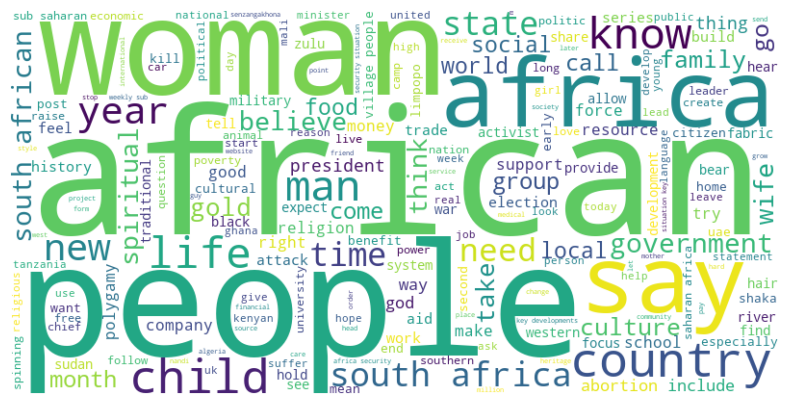

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reddit_df = reddit_df.head(1000)  # limit to first 1000 rows for testing

all_words = " ".join(reddit_df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Metadata visualizations
- Score distribution

<Axes: xlabel='score', ylabel='Count'>

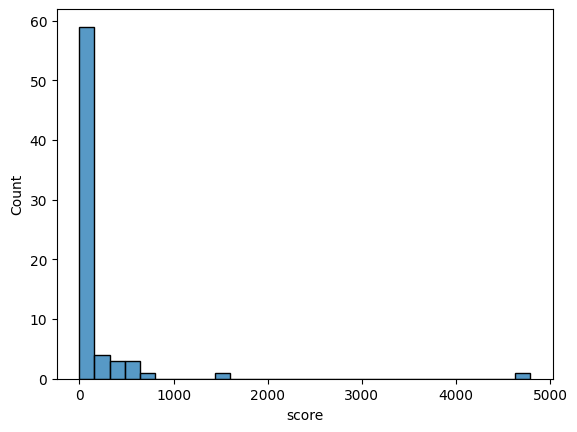

In [3]:
import seaborn as sns
sns.histplot(reddit_df['score'], bins=30)


Engagement analysis

- Correlation between score and comments (engagement scatterplot)

Shows whether high-scoring posts also tend to have more comments.

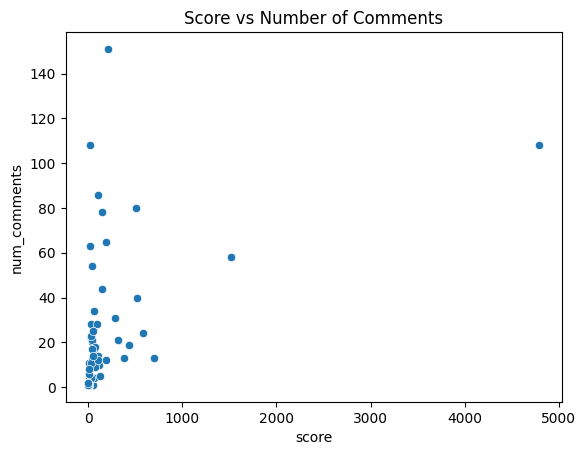

In [4]:
sns.scatterplot(data=reddit_df, x='score', y='num_comments')
plt.title("Score vs Number of Comments")
plt.show()

monotonic relationships beyond scatterplots

In [5]:
print(reddit_df[['score','num_comments']].corr(method='spearman'))

                 score  num_comments
score         1.000000      0.749881
num_comments  0.749881      1.000000


Text length vs engagement

In [6]:
# Add a column for text length
reddit_df['text_length'] = reddit_df['full_text'].str.len()

Scatterplot: text length vs score

- to find out if longer posts tend to get more upvotes.

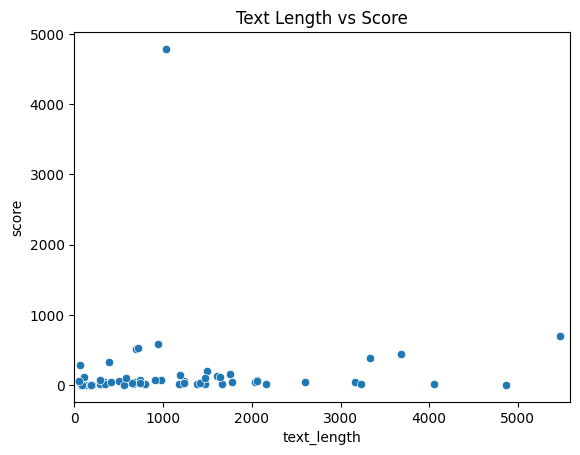

In [7]:
sns.scatterplot(data=reddit_df, x='text_length', y='score')
plt.xlim(0, reddit_df['text_length'].quantile(0.95)) # trim outliers
plt.title("Text Length vs Score")
plt.show()

Keyword-level patterns
- Group by keyword (if you have more than one keyword in your dataset)

- Compare engagement metrics across keywords.

In [8]:
keyword_stats = reddit_df.groupby('keyword').agg(
    avg_score=('score','mean'),
    avg_comments=('num_comments','mean'),
    post_count=('keyword','count')
).sort_values(by='avg_score', ascending=False)

print(keyword_stats.head())


          avg_score  avg_comments  post_count
keyword                                      
africa   178.027778     20.763889          72


Top frequent terms

In [9]:
from collections import Counter
all_words = " ".join(reddit_df['processed_text']).split()
common_words = Counter(all_words).most_common(20)
print(common_words)


[('africa', 89), ('people', 78), ('african', 77), ('woman', 56), ('south', 53), ('say', 45), ('like', 42), ('country', 41), ('child', 41), ('know', 35), ('life', 35), ('man', 34), ('year', 28), ('africans', 24), ('time', 24), ('need', 23), ('state', 22), ('government', 22), ('group', 21), ('think', 20)]


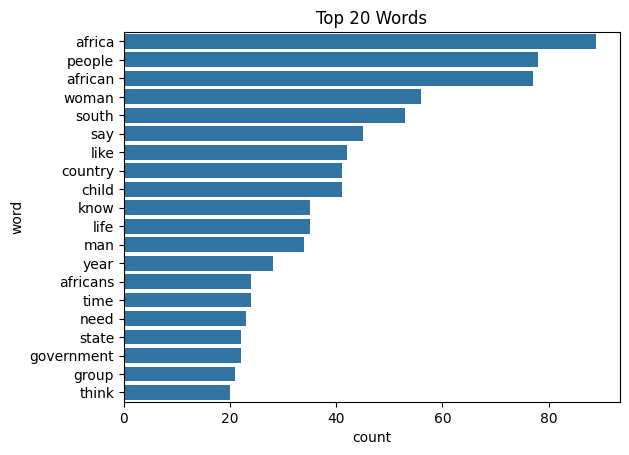

In [10]:
import pandas as pd
freq_df = pd.DataFrame(common_words, columns=['word','count'])
sns.barplot(data=freq_df, x='count', y='word')
plt.title("Top 20 Words")
plt.show()


Engagement buckets

- idea of how posts are distributed across score ranges.

<Axes: title={'center': 'Distribution of Score Buckets'}, xlabel='score_bucket'>

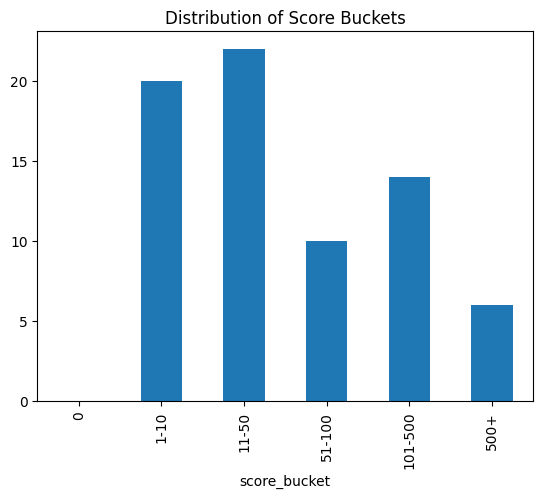

In [11]:
reddit_df['score_bucket'] = pd.cut(reddit_df['score'],
                                   bins=[-1,0,10,50,100,500,reddit_df['score'].max()],
                                   labels=['0','1-10','11-50','51-100','101-500','500+'])
score_dist = reddit_df['score_bucket'].value_counts().sort_index()
score_dist.plot(kind='bar', title="Distribution of Score Buckets")


**Advanced NLP-driven EDA**

* quick sentiment using VADER

<Axes: xlabel='sentiment', ylabel='Count'>

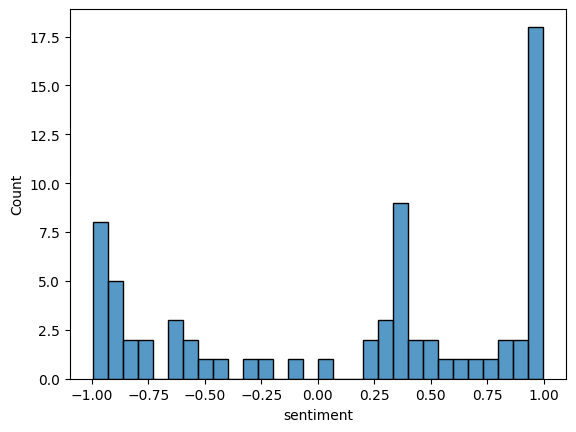

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() #Initializing the analyzer
reddit_df['sentiment'] = reddit_df['full_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
sns.histplot(reddit_df['sentiment'], bins=30)


how sentiment varies with score:

<Axes: xlabel='sentiment', ylabel='score'>

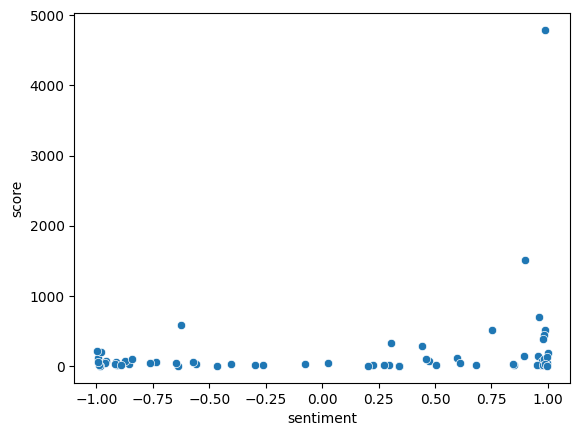

In [13]:
sns.scatterplot(x='sentiment', y='score', data=reddit_df)


---

two sets is getting wider at this stage , Eda on news data and other steps after will remain pending and TBD as I focus on reddit, and best alternatives to work on two datasets separately 

---

this a temporary hold to test a more direct to the objective not yet worked on

In [37]:
keywords = ['usaid', 'funding cut', 'funding', 'budget cut', 'aid cut', 'foreign aid', 'us aid', 'grants', 'development aid']
reddit_df = reddit_df[reddit_df['processed_text'].str.contains('|'.join(keywords), case=False, na=False)]

---

### Sentiment Analysis

Using VADER sentiment analysis because it’s lightweight, tuned for social media text, and easy to apply.

* sentiment analyzer already called above 
* full_text (more natural for sentiment):
* below defining function to apply and introdustion of a sentiment column

In [14]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # overall sentiment score from -1 (neg) to +1 (pos)

reddit_df['sentiment'] = reddit_df['full_text'].apply(get_sentiment)


Sentiment Interpretation 

In [15]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

reddit_df['sentiment_label'] = reddit_df['sentiment'].apply(categorize_sentiment)


sentiment distribution

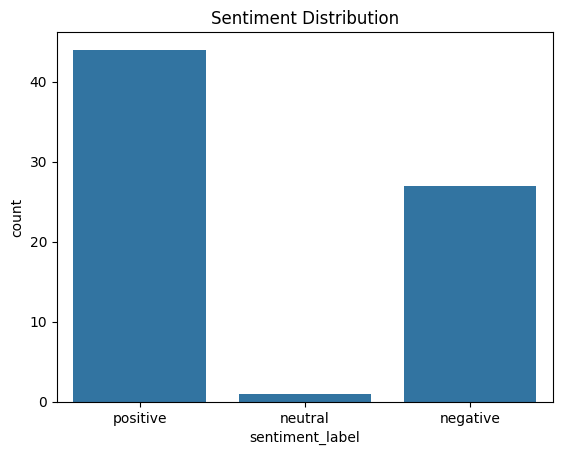

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=reddit_df, x='sentiment_label', order=['positive','neutral','negative'])
plt.title("Sentiment Distribution")
plt.show()


sentiment vs engagement

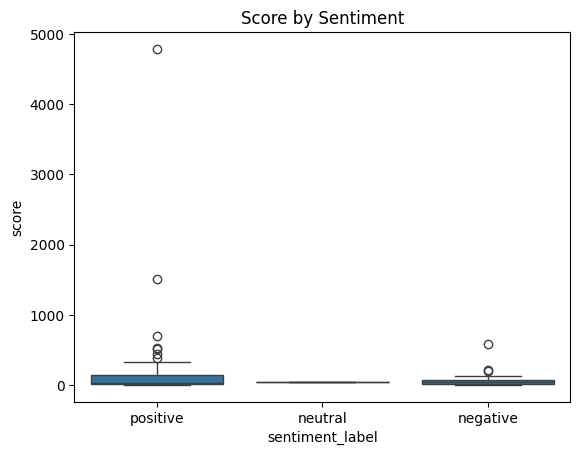

In [17]:
sns.boxplot(data=reddit_df, x='sentiment_label', y='score',
            order=['positive','neutral','negative'])
plt.title("Score by Sentiment")
plt.show()


---

### Topic modeling

To discover hidden themes or topics within posts without labels.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Vectorize your text

* Latent Dirichlet Allocation (LDA) with a CountVectorizer or TF‑IDF (For LDA, CountVectorizer (word counts) works better than TF‑IDF.)

In [19]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english') 
# max_df=0.95: ignore very common words
# min_df=2: ignore rare words that appear only once

dtm = vectorizer.fit_transform(reddit_df['processed_text'])


In [20]:
#Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42) #Choose number of topics
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [21]:
#Topics

# Get the words
words = vectorizer.get_feature_names_out()

# Print top words per topic
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # top 10 words
    top_words = [words[i] for i in top_words_idx]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")


Topic 1: african, south, life, africa, people, child, state, need, say, like
Topic 2: africa, african, south, gold, hair, know, like, people, uae, aid
Topic 3: woman, man, multiple, africa, wife, child, country, people, like, algeria
Topic 4: people, africans, spiritual, say, village, attack, country, opposition, religion, leader
Topic 5: car, border, child, music, south, development, financial, cross, township, burkina


In [22]:
#Assigning dominant topic to each document
topic_values = lda.transform(dtm)
reddit_df['dominant_topic'] = topic_values.argmax(axis=1)
reddit_df[['full_text', 'dominant_topic']].head()


,full_text,dominant_topic
0,Planning an Outreach to an Internally Displace...,0
1,I don't know how to title this but... Is it on...,1
2,Canadian mining company stripped of gold mine ...,4
3,At least 100 people killed in gunmen attack in...,3
4,Sub Saharan Africa Security Situation and Key ...,2


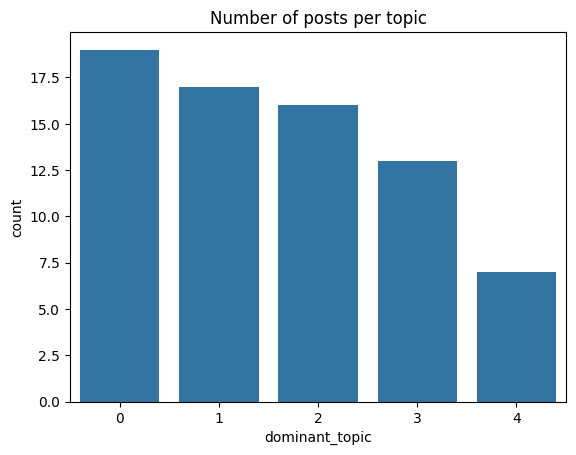

In [23]:
#Topic distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='dominant_topic', data=reddit_df)
plt.title("Number of posts per topic")
plt.show()

Bigramas
 * Using ngram_range=(1, 2) allows the model to capture common phrases (e.g., "climate change", "african union") instead of just single words. This gives more meaningful topics.

In [24]:
# Vectorize with bigrams

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 2)  # THIS enables bigrams
)

dtm = vectorizer.fit_transform(reddit_df['processed_text'])


In [27]:
#Fiting LDA with different n_components values
# 5, 10, and 15 topics to print top terms for each:

from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        print(f"Topic #{topic_idx+1}: {', '.join(top_words)}\n")

# Loop through topic numbers
for n_topics in [5, 10, 15]:
    print(f"\n LDA with {n_topics} topics:\n" + "-"*40)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    feature_names = vectorizer.get_feature_names_out()
    display_topics(lda, feature_names)



 LDA with 5 topics:
----------------------------------------
Topic #1: gold, hair, cut, animal, african, immigrant, spiritual, tunisia, like, say

Topic #2: africa, need, sub, country, company, security, sub saharan, saharan, saharan africa, situation

Topic #3: south, african, africa, south africa, south african, know, woman, history, group, series

Topic #4: say, algeria, opposition, country, tanzania, activist, election, lissu, south, leader

Topic #5: people, woman, africa, child, man, life, like, africans, african, believe


 LDA with 10 topics:
----------------------------------------
Topic #1: animal, man, cut, ancient, fall, head, right, make, hold, force

Topic #2: africa, tanzania, lissu, leader, opposition, country, say, activist, charge, arrest

Topic #3: african, south, africa, south african, woman, group, south africa, president, traditional, southern

Topic #4: africa, algeria, mali, situation, saharan, saharan africa, sub saharan, key, key developments, africa security

After the topical review, to narrow down topics based on objects 
* Focusing on USAID Funding Cuts

In [34]:
keywords = ['usaid', 'funding cut', 'funding', 'budget cut', 'aid cut', 'foreign aid', 'us aid', 'grants', 'development aid']
usaid_df = reddit_df[reddit_df['processed_text'].str.contains('|'.join(keywords), case=False, na=False)]

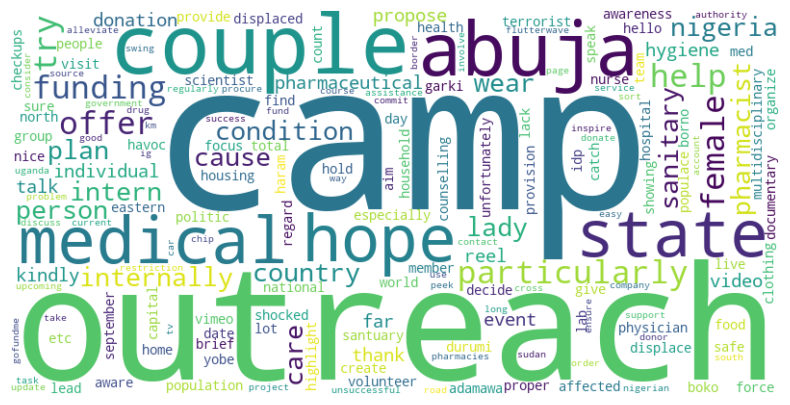

In [35]:
usaid_df = usaid_df.head(1000)  # limit to first 1000 rows for testing

all_words = " ".join(usaid_df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
usaid_df['sentiment'] = usaid_df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)